<a href="https://colab.research.google.com/github/Paramesh21/Multi-classification-of-Sugarcane-Disease-Using-Transfer-Learning/blob/main/Class_model_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Research Project: Multi-classification of Sugarcane Disease Using Transfer Learning***
**Name:** Parameswaran A
<br>**Email:** parameswaran.a@bds.christuniversity.in
<hr>

**Research Mentor:** Dr.D. Suryaprabha

1. **Problem Statement**
  - The primary objective of this project is to develop a robust multi-class classification model capable of identifying the health status of sugarcane leaves based on the presence of red rot and red rust disease. With three distinct classes involved, namely "Healthy", "Red Rot", "Red Rust" potential classes, the project must accurately categorize the images to enable early disease detection in agriculture for preventing significant crop losses.

1. **Objectives:**
  - **Model Loading:** Loading of a pre-trained vision transformer (VIT) model specifically designed for multi-class image classification. This model must be trained on dataset of sugarcane leaf images, encompassing all three classes.
  - **Image Classification:** The core focus lies in accurately classifying input images of sugarcane leaves into one of the three defined classes, i.e., "Healthy", "Red Rot", "Red Rust Disease".
  - **Display Image:** Matplotlib is utilized to present the input images in a visually comprehensible and organized manner, ensuring clarity in understanding the classified images.
  - **Output Results:** It should specify whether the leaf is classified as "Healthy" or "Red Rot" or "Red Rust  based on the classification results.

1. **Approaches:**

  - **Model Loading (Load Model):** The code loads a pre-trained CNN model from a specified file path.

  - **Image Classification (Classify Image):** A function is defined for image classification, taking an image file path as input. The approach includes:

    - Loading the image and resizing it to the model's input size (384x384 pixels).
    - Normalizing the pixel values to the range [0, 1].
    - Preparing the image for prediction by adding a batch dimension.
    - Using the loaded model to predict the class.
    - Optionally mapping class indices to human-readable labels using a provided class mapping.

  - **Display Image (Matplotlib):** The code uses Matplotlib to create a figure, display the image, and turn off axis labels and ticks for a clean image presentation.

  - **Output Results:** The code prints the top predicted classes. It also displays the image and outputs whether the leaf is Healthy or the diseased based on the classification results.

1. **Observations:**<br>
  _The project successfully achieves the objective of multi-class classification for detecting Healthy, Red Rot, Red Rust disease in sugarcane leaves. Some key observations and enhancements are:_
  - _The code loads a pre-trained model, which must be trained on a dataset of sugarcane leaf images._
  - _The code provides clear and organized image display using Matplotlib._
  - _It offers informative output with an accuracy of 96.79%, including the top predicted classes of the given leaf image of SugarCane._


**Dataset:** https://www.kaggle.com/datasets/alihussainkhan24/red-rot-sugarcane-disease-leaf-dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%pip install timm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.9 MB/s eta 0:00:00


In [ ]:
import torch
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
import timm
import torch.nn as nn
import shutil
from torch.optim.lr_scheduler import ReduceLROnPlateau
import matplotlib.pyplot as plt

In [ ]:
# Define the paths to the training and testing datasets
train_dataset_path = "/content/drive/MyDrive/Internship/Final_Dataset/Training_data"
test_dataset_path = "/content/drive/MyDrive/Internship/Final_Dataset/Testing_data"
destination = "/content/drive/MyDrive/Internship/best_model_saved.pth"


In [ ]:
# Add your data loading and preprocessing
transform = transforms.Compose([
    transforms.Resize((384, 384)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = ImageFolder(root=train_dataset_path, transform=transform)
test_dataset = ImageFolder(root=test_dataset_path, transform=transform)



In [ ]:
# Define the data loaders for training and validation
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Move the model to the GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the pretrained ViT-B/16 model
vit_b16 = timm.create_model('vit_base_patch16_384', pretrained=True)

# Modify the head to match the number of classes in your dataset
num_classes = 3
vit_b16.head = nn.Linear(vit_b16.head.in_features, num_classes)

if device.type == "cuda":
    vit_b16.to(device)

# Define the optimizer for fine-tuning
optimizer_fine_tune = optim.Adam(vit_b16.parameters(), lr=1e-5, weight_decay=1e-5)

# Define the criterion for the loss function
criterion = nn.CrossEntropyLoss()

# Define the learning rate scheduler
scheduler = ReduceLROnPlateau(optimizer_fine_tune, mode='min', factor=0.1, patience=3, verbose=True)

# Fine-tune the model on the augmented datasets
num_epochs_fine_tune = 35  # Increase the number of epochs

# Lists to store the training history
train_loss_history = []
train_acc_history = []
val_loss_history = []
val_acc_history = []
lr_history = []

best_val_loss = float('inf')
best_model_path = 'best_model.pth'

model.safetensors:   0%|          | 0.00/347M [00:00<?, ?B/s]

In [ ]:
# Fine-tune the model on the augmented datasets
for epoch in range(num_epochs_fine_tune):
    vit_b16.train()
    total_train_correct = 0
    total_train_samples = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer_fine_tune.zero_grad()
        outputs = vit_b16(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_fine_tune.step()

        # Calculate the actual training accuracy and store it
        _, predicted = torch.max(outputs, 1)
        total_train_correct += (predicted == labels).sum().item()
        total_train_samples += labels.size(0)
        train_acc = total_train_correct / total_train_samples
        train_acc_history.append(train_acc)


    # Perform validation and record validation loss and accuracy
    with torch.no_grad():
        vit_b16.eval()
        total_val_correct = 0
        total_val_samples = 0
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = vit_b16(images)
            val_loss = criterion(outputs, labels)
            _, predicted = torch.max(outputs, 1)
            total_val_correct += (predicted == labels).sum().item()
            total_val_samples += labels.size(0)
        val_acc = total_val_correct / total_val_samples
        val_acc_history.append(val_acc)

        # Save the best model based on validation loss
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(vit_b16.state_dict(), best_model_path)

    # Record the training history
    train_loss_history.append(loss.item())
    val_loss_history.append(val_loss.item())

    # Step the learning rate scheduler based on validation loss
    scheduler.step(val_loss)

    # Print the epoch-wise information
    print(f"Epoch {epoch + 1} completed. Train Loss: {loss.item()}, Train Accuracy: {train_acc}, Val Loss: {val_loss}, Val Accuracy: {val_acc}, LR: {scheduler.optimizer.param_groups[0]['lr']}")

# Specify the source and destination paths
source = best_model_path
# Copy the model to the destination path
shutil.copyfile(source, destination)

print(f"Model saved to: {destination}")



Epoch 1 completed. Train Loss: 0.06198868900537491, Train Accuracy: 0.9073333333333333, Val Loss: 0.10159727931022644, Val Accuracy: 0.924198250728863, LR: 1e-05
Epoch 2 completed. Train Loss: 0.0006779822870157659, Train Accuracy: 0.996, Val Loss: 0.14044059813022614, Val Accuracy: 0.9329446064139941, LR: 1e-05
Epoch 3 completed. Train Loss: 0.02086177095770836, Train Accuracy: 0.9993333333333333, Val Loss: 0.3136519491672516, Val Accuracy: 0.9329446064139941, LR: 1e-05
Epoch 4 completed. Train Loss: 8.228552906075493e-05, Train Accuracy: 1.0, Val Loss: 0.040355511009693146, Val Accuracy: 0.9708454810495627, LR: 1e-05
Epoch 5 completed. Train Loss: 0.00016407588555011898, Train Accuracy: 1.0, Val Loss: 0.06766420602798462, Val Accuracy: 0.9620991253644315, LR: 1e-05
Epoch 6 completed. Train Loss: 0.00015080685261636972, Train Accuracy: 1.0, Val Loss: 0.1251256912946701, Val Accuracy: 0.9591836734693877, LR: 1e-05
Epoch 7 completed. Train Loss: 0.00010916741302935407, Train Accuracy: 1

In [ ]:
# Load the best model
best_model_path= "/content/drive/MyDrive/Internship/best_model_saved.pth"
vit_b16.load_state_dict(torch.load(best_model_path))

# Evaluate the final accuracy on the test dataset
with torch.no_grad():
    vit_b16.eval()
    total_test_correct = 0
    total_test_samples = 0
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = vit_b16(images)
        _, predicted = torch.max(outputs, 1)
        total_test_correct += (predicted == labels).sum().item()
        total_test_samples += labels.size(0)
    test_acc = total_test_correct / total_test_samples
    print(f"Final Test Accuracy: {test_acc}")


Final Test Accuracy: 0.967930029154519


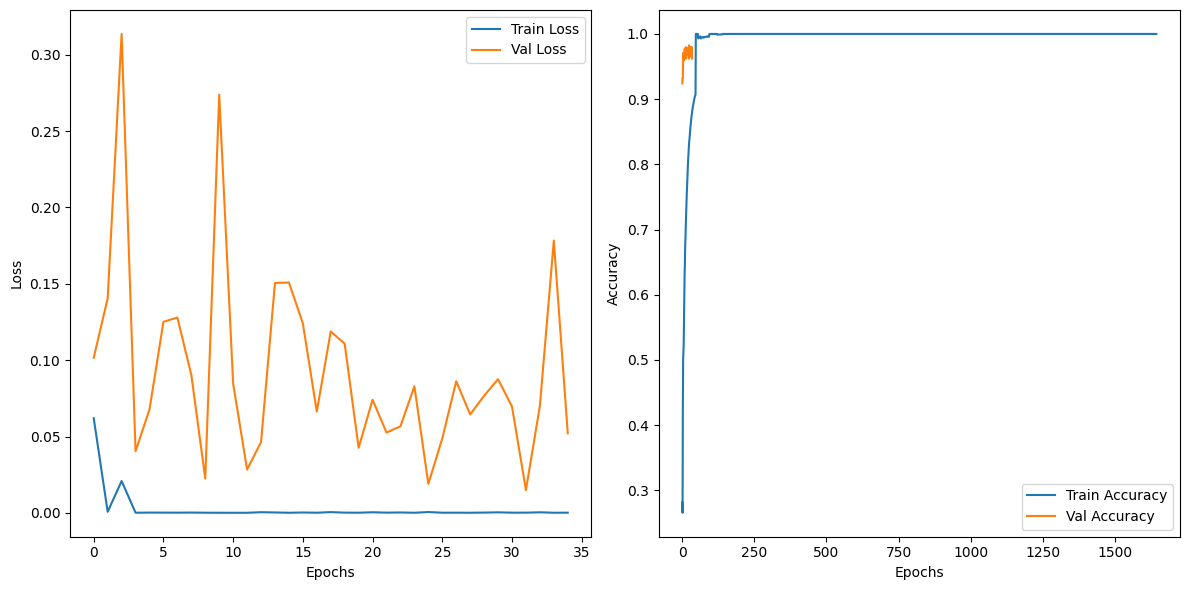

In [ ]:
# Plotting the training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_loss_history, label='Train Loss')
plt.plot(val_loss_history, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_acc_history, label='Train Accuracy')
plt.plot(val_acc_history, label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

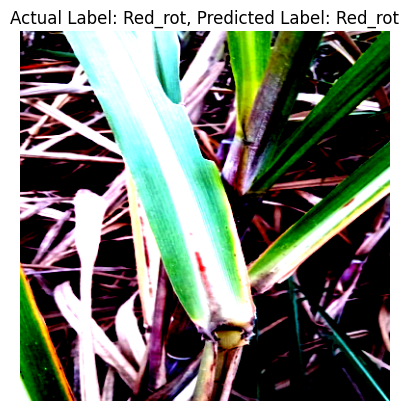

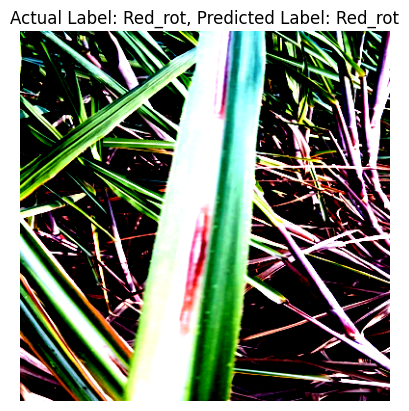

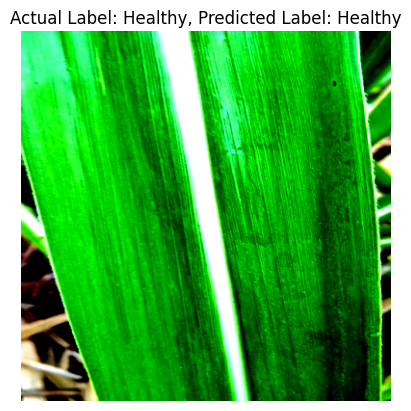

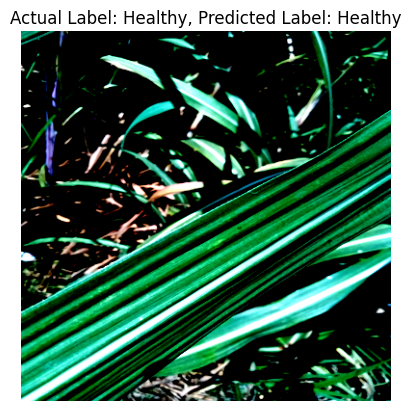

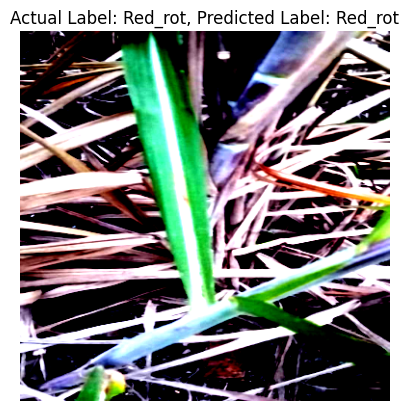

Correctly predicted 5 out of 5 images.


In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from PIL import Image
import matplotlib.pyplot as plt
import timm
import torch.nn as nn

# Define the paths to the testing dataset
test_dataset_path = "/content/drive/MyDrive/Internship/Final_Dataset/Testing_data"

# Load the saved model
model_path = "/content/drive/MyDrive/Internship/best_model_saved.pth"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the pretrained ViT-B/16 model
vit_b16 = timm.create_model('vit_base_patch16_384', pretrained=True)
num_classes = 3
vit_b16.head = nn.Linear(vit_b16.head.in_features, num_classes)
vit_b16.load_state_dict(torch.load(model_path))
vit_b16.to(device)
vit_b16.eval()

# Define the transformation for the images
transform = transforms.Compose([
    transforms.Resize((384, 384)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the testing dataset
test_dataset = ImageFolder(root=test_dataset_path, transform=transform)

# Create a data loader for the testing dataset
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True)

# Function to display the image along with its actual and predicted labels
def test_image(image, label, model, test_dataset):
    with torch.no_grad():
        image = image.to(device)
        output = model(image)
        _, predicted = torch.max(output, 1)
        predicted_label = test_dataset.classes[predicted]
        actual_label = test_dataset.classes[label]
        plt.imshow(image.cpu().squeeze().permute(1, 2, 0))
        plt.title(f"Actual Label: {actual_label}, Predicted Label: {predicted_label}")
        plt.axis('off')
        plt.show()
        return predicted.item() == label.item()

# Test the model on 5 random images
num_images = 5
correct_predictions = 0

for images, labels in test_loader:
    is_correct = test_image(images, labels, vit_b16, test_dataset)
    if is_correct:
        correct_predictions += 1

    if correct_predictions >= num_images:
        break

# Display the number of correctly predicted images
print(f"Correctly predicted {correct_predictions} out of {num_images} images.")
